<a href="https://colab.research.google.com/github/Yanina-Kutovaya/AutoML/blob/main/notebooks/AutoML_Alex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mercedes-Benz Greener Manufacturing
## Optimize R2

https://www.kaggle.com/competitions/mercedes-benz-greener-manufacturing

https://github.com/Alex-Lekov/AutoML_Alex

In [1]:
#!pip install automl-alex

In [2]:
import sklearn
import pandas as pd
from sklearn.model_selection import train_test_split
import time

import automl_alex
from automl_alex import DataPrepare, LightGBM, ExtraTrees, RandomForest

print(automl_alex.__version__)

1.6.10


## 1. Data ingestion

In [3]:
#!pip install -q kaggle
#!mkdir ~/.kaggle
#!cp kaggle.json ~/.kaggle/
#!chmod 600 ~/.kaggle/kaggle.json
#!kaggle competitions download -c mercedes-benz-greener-manufacturing
#!unzip mercedes-benz-greener-manufacturing.zip

In [4]:
train = pd.read_csv('train.csv.zip', index_col='ID')
test = pd.read_csv('test.csv.zip', index_col='ID')
sample_submission = pd.read_csv('sample_submission.csv.zip')

In [5]:
print(f'train.shape = {train.shape}\n')
train.head(2)

train.shape = (4209, 377)



,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
ID,,,,,,,,,,,,,,,,,,,,,
0,130.81,k,v,at,a,d,u,j,o,0,...,0,0,1,0,0,0,0,0,0,0
6,88.53,k,t,av,e,d,y,l,o,0,...,1,0,0,0,0,0,0,0,0,0


In [6]:
print(f'test.shape = {test.shape}\n')
test.head(2)

test.shape = (4209, 376)



,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
ID,,,,,,,,,,,,,,,,,,,,,
1,az,v,n,f,d,t,a,w,0,0,...,0,0,0,1,0,0,0,0,0,0
2,t,b,ai,a,d,b,g,y,0,0,...,0,0,1,0,0,0,0,0,0,0


In [7]:
print(f'sample_submission.shape = {sample_submission.shape}\n')
sample_submission.head(2)

sample_submission.shape = (4209, 2)



,ID,y
0,1,100.669318
1,2,100.669318


## 2. Train valid split

In [8]:
RANDOM_SEED = 42

In [9]:
X_train, X_valid, y_train, y_valid = train_test_split(
    train.drop('y', axis=1), train['y'], test_size=0.2, random_state=RANDOM_SEED,
)
X_train.shape, X_valid.shape

((3367, 376), (842, 376))

In [10]:
X_train.head(2)

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
ID,,,,,,,,,,,,,,,,,,,,,
2011,m,v,as,c,d,ag,k,x,0,0,...,0,0,1,0,0,0,0,0,0,0
3690,n,s,as,d,d,ae,g,s,0,0,...,1,0,0,0,0,0,0,0,0,0


## 3. Data preprocessing

In [11]:
de = DataPrepare(
    normalization=False, # for Linar based models -> True
    random_state=RANDOM_SEED,
)
X_train = de.fit_transform(X_train)
X_valid = de.transform(X_valid)
X_train.shape, X_valid.shape

01:39:32 | Source data shape: (3367, 376)
01:39:32 | ##################################################
01:39:32 | ! START preprocessing Data
01:39:32 | - Auto detect cat features: 6
01:39:32 | > Binary Features
01:39:32 | > Clean Categorical Features
01:39:32 | > Transform Categorical Features.
01:39:32 |  - Encoder: HelmertEncoder ADD features: 98


01:39:32 |  - Encoder: CountEncoder ADD features: 6
01:39:32 |   No nans features
01:39:32 | > CleanOutliers
01:39:33 | ##################################################
01:39:33 | Final data shape: (3367, 467)
01:39:33 | Total ADD columns: 91
01:39:33 | Time fit data_preproc: 0.54 sec
01:39:33 | ##################################################
01:39:33 | ##################################################
01:39:33 | ! Start Transform Data
01:39:33 | > Clean Binary Features
01:39:33 | > Clean Categorical Features
01:39:33 | > Transform Categorical Features.
01:39:33 |  - Encoder: HelmertEncoder ADD features: 98
01:39:33 |  - Encoder: CountEncoder ADD features: 6
01:39:33 | ##################################################
01:39:33 | Final data shape: (842, 467)
01:39:33 | Total ADD columns: 91
01:39:33 | ##################################################


((3367, 467), (842, 467))

In [12]:
X_train.head(2)

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,HelmertEncoder_X8_20,HelmertEncoder_X8_21,HelmertEncoder_X8_22,HelmertEncoder_X8_23,CountEncoder_X1,CountEncoder_X3,CountEncoder_X4,CountEncoder_X5,CountEncoder_X6,CountEncoder_X8
0,1,1,1,1,1,1,1,1,0,0,...,-1.0,-1.0,-1.0,-1.0,317,1541,3363,168,33,88
1,2,2,1,2,1,2,2,2,0,0,...,-1.0,-1.0,-1.0,-1.0,470,229,3363,157,837,206


In [13]:
de.save('de_model_v1',)

01:39:42 | Save DataPrepare


## 4. Models

### 4.1 Base model

In [14]:
y_pred = [y_train.mean()] * y_valid.shape[0]
r2_score = round(sklearn.metrics.r2_score(y_valid, y_pred), 4)
print(f'\nValid R2 base model: {r2_score}\n') 


Valid R2 base model: -0.0



### 4.2 AutoML_Alex models

In [15]:
# Currently available libraries:
automl_alex.models.all_models

{'LightGBM': automl_alex.models.model_lightgbm.LightGBM,
 'KNeighbors': automl_alex.models.sklearn_models.KNeighbors,
 'LinearModel': automl_alex.models.sklearn_models.LinearModel,
 'RandomForest': automl_alex.models.sklearn_models.RandomForest,
 'ExtraTrees': automl_alex.models.sklearn_models.ExtraTrees,
 'XGBoost': automl_alex.models.model_xgboost.XGBoost,
 'CatBoost': automl_alex.models.model_catboost.CatBoost,
 'MLP': automl_alex.models.sklearn_models.MLP}

In [16]:
models = [LightGBM, ExtraTrees, RandomForest]
history = {}
predicts = {}
models_ = {}

for i, model in enumerate(models):
  model_ = model(type_of_estimator='regression', random_state=RANDOM_SEED,)
  history[i] = model_.opt(
      X_train, y_train,
      metric=sklearn.metrics.r2_score, # log_loss
      timeout=1200, # sec
      auto_parameters=False, # try to set the rules ourselves
      folds=10,
      score_folds=3, # put 3 folds
      cold_start=50, # I plan > 200 iterations. 50 iterations are enough to evaluate the space
      opt_lvl=3,
      early_stoping=100, # stop otimization if no better parameters are found through iterations
      verbose=3,
  )
  model_.fit(X_train, y_train)
  predicts[i] = model_.predict(X_valid)
  r2_score = round(sklearn.metrics.r2_score(y_valid, predicts[i]), 4)
  print(f'\nValid R2 model {i}: {r2_score}\n')  
  model_.save(f'model_{i}',)
  models_[i] = model_

01:40:01 | regression optimize: maximize
01:40:01 | ##################################################
01:40:01 | > Step 1: calc parameters and pruned score: get test 10 trials
01:40:44 |  One iteration ~ 4.2 sec
01:40:44 |  Possible iters ~ 282.0
01:40:44 | --------------------------------------------------
01:40:44 |   Pruned Threshold Score: 0.55
01:40:44 | ##################################################
01:40:44 | > Step 2: Full opt with Threshold Score Pruner
01:40:44 | ##################################################
01:40:44 | > Start optimization with the parameters:
01:40:44 | CV_Folds = 10
01:40:44 | Score_CV_Folds = 3
01:40:44 | Feature_Selection = False
01:40:44 | Opt_lvl = 3
01:40:44 | Cold_start = 50
01:40:44 | Early_stoping = 100
01:40:44 | Metric = r2_score
01:40:44 | Direction = maximize
01:40:44 | ##################################################
Optimize: : 250it [08:36,  2.07s/it, | Model: LightGBM | OptScore: 0.6186 | Best r2_score: 0.625 ]
01:49:21 | 
 Early


Valid R2 model 0: 0.5929



01:49:28 | > Step 1: calc parameters and pruned score: get test 10 trials
02:02:52 |  One iteration ~ 80.4 sec
02:02:52 |  Possible iters ~ 14.0
02:02:52 | ! Not enough time to find the optimal parameters. 
                     Possible iters < 100. 
                     Please, Increase the 'timeout' parameter for normal optimization.
02:02:52 | --------------------------------------------------
02:02:53 |   Pruned Threshold Score: 0.5478
02:02:53 | ##################################################
02:02:53 | > Step 2: Full opt with Threshold Score Pruner
02:02:53 | ##################################################
02:02:53 | > Start optimization with the parameters:
02:02:53 | CV_Folds = 10
02:02:53 | Score_CV_Folds = 3
02:02:53 | Feature_Selection = False
02:02:53 | Opt_lvl = 3
02:02:53 | Cold_start = 50
02:02:53 | Early_stoping = 100
02:02:53 | Metric = r2_score
02:02:53 | Direction = maximize
02:02:53 | ##################################################
Optimize: : 0it [00:00, ?


Valid R2 model 1: 0.5771



02:05:27 | regression optimize: maximize
02:05:27 | ##################################################
02:05:27 | > Step 1: calc parameters and pruned score: get test 10 trials
02:22:08 |  One iteration ~ 100.1 sec
02:22:08 |  Possible iters ~ 11.0
02:22:08 | ! Not enough time to find the optimal parameters. 
                     Possible iters < 100. 
                     Please, Increase the 'timeout' parameter for normal optimization.
02:22:08 | --------------------------------------------------
02:22:08 |   Pruned Threshold Score: 0.4894
02:22:08 | ##################################################
02:22:08 | > Step 2: Full opt with Threshold Score Pruner
02:22:08 | ##################################################
02:22:08 | > Start optimization with the parameters:
02:22:08 | CV_Folds = 10
02:22:08 | Score_CV_Folds = 3
02:22:08 | Feature_Selection = False
02:22:08 | Opt_lvl = 3
02:22:08 | Cold_start = 50
02:22:08 | Early_stoping = 100
02:22:08 | Metric = r2_score
02:22:08 | Dire


Valid R2 model 2: 0.5746



## Best model

In [17]:
i = 0
best_model = models_[i]

In [18]:
best_model.model_param

{'random_seed': 42,
 'num_iterations': 400,
 'verbose': -1,
 'device_type': 'cpu',
 'objective': 'regression',
 'num_leaves': 6,
 'learning_rate': 0.017108218948092564,
 'min_child_samples': 26,
 'bagging_fraction': 0.7000000000000001,
 'feature_fraction': 1.0,
 'bagging_freq': 9}

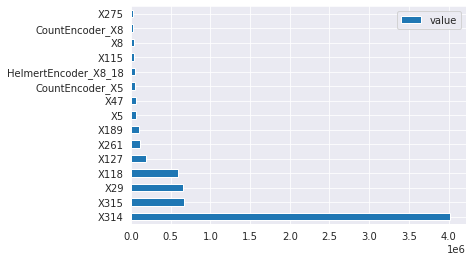

In [19]:
feature_importance = best_model.get_feature_importance(X_train)
feature_importance.sort_values(by='value', ascending=False)[:15].plot(kind='barh');

In [20]:
best_model.plot_opt_history()

In [21]:
best_model.plot_opt_param_importances()

## 6. Load model

In [22]:
de_new = DataPrepare(random_state=RANDOM_SEED, verbose=0)
de_new = de_new.load('de_model_v1',)

model_new = LightGBM(type_of_estimator='regression', random_state=RANDOM_SEED,)
model_new = model_new.load('model_0',)

X_train, X_valid, y_train, y_valid = train_test_split(
    train.drop('y', axis=1), train['y'], test_size=0.2, random_state=RANDOM_SEED,
)
X_valid = de_new.transform(X_valid)
predicts = model_new.predict(X_valid)
print('Valid R2: ', round(sklearn.metrics.r2_score(y_valid, predicts), 4))

02:26:20 | ##################################################
02:26:20 | ! Start Transform Data
02:26:20 | > Clean Binary Features
02:26:20 | > Clean Categorical Features
02:26:20 | > Transform Categorical Features.
02:26:20 |  - Encoder: HelmertEncoder ADD features: 98
02:26:20 |  - Encoder: CountEncoder ADD features: 6
02:26:20 | ##################################################
02:26:20 | Final data shape: (842, 467)
02:26:20 | Total ADD columns: 91
02:26:20 | ##################################################


Valid R2:  0.5929


In [23]:
model_new.model_param

{'random_seed': 42,
 'num_iterations': 400,
 'verbose': -1,
 'device_type': 'cpu',
 'objective': 'regression',
 'num_leaves': 6,
 'learning_rate': 0.017108218948092564,
 'min_child_samples': 26,
 'bagging_fraction': 0.7000000000000001,
 'feature_fraction': 1.0,
 'bagging_freq': 9}

## 7. Final prediction

In [24]:
X_test = de_new.transform(test)

02:26:31 | ##################################################
02:26:31 | ! Start Transform Data
02:26:31 | > Clean Binary Features
02:26:31 | > Clean Categorical Features
02:26:31 | > Transform Categorical Features.
02:26:31 |  - Encoder: HelmertEncoder ADD features: 98
02:26:31 |  - Encoder: CountEncoder ADD features: 6
02:26:31 | ##################################################
02:26:31 | Final data shape: (4209, 467)
02:26:31 | Total ADD columns: 91
02:26:31 | ##################################################


In [25]:
predicts = model_new.predict(X_test)

In [26]:
sample_submission.loc[:, 'y'] = predicts
sample_submission.tail(2)

,ID,y
4207,8414,109.529819
4208,8416,92.486012


In [27]:
sample_submission.to_csv('submission_v1.csv', index=False)
# Score: 0.55078 Private score: 0.5451